# Set up

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'male-and-female/training_set'
valid_path = 'male-and-female/validation_set'
test_path = 'male-and-female/test_set'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256, 256), classes=['Male', 'Female'], batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256, 256), classes=['Male', 'Female'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256, 256), classes=['Male', 'Female'], batch_size=20)

Found 3820 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [4]:
def plot(imgs, labels):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 4))

    count = 0

    for i in range(2):
        for j in range(10):
            axes[i][j].imshow(imgs[count]/255)
            axes[i][j].set_title('Male' if (labels[count][0] == 1) else 'Female')
            count = count + 1

    plt.tight_layout()     

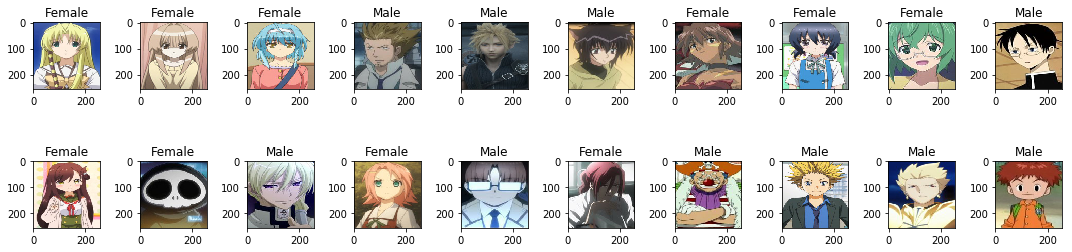

In [5]:
imgs, labels = next(train_batches)
plot(imgs, labels)